In [8]:
#from mls import Learn
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import scipy.stats

import SDSS_CCL as sccl

import emcee
import corner
from chainconsumer import ChainConsumer

In [9]:
def log_prior(theta):
    b, Om = theta
    if 0.6 < b < 4 and 0.1 < Om < 1.0 :
        return 0.0
    return -np.inf

In [10]:
def log_likelihood(theta, corr_tree, data, centers):
    corr_ccl = sccl.getcorrCCL(theta, data, centers)
    return -0.5*np.einsum('i,i',(corr_tree- theta[0]**2*corr_ccl), 
                          np.einsum('ij,j', inv_cov,(corr_tree- theta[0]**2*corr_ccl)))

In [11]:
def log_probability(theta, corr_tree, data, centers):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, corr_tree, data, centers)

In [12]:
data = sccl.getdata()[0]
corr_tree, centers, cov = sccl.getcorrTree(data)
corr_tree = corr_tree[0]
inv_cov = np.linalg.inv(cov)

In [13]:
# see file SDSS_CCL.ipynb
sccl.findb(data)

NameError: name 'minimize' is not defined

In [ ]:
#pos = [1.2153125000000014, 0.31] + 1e-4 * np.random.randn(6, 2)
pos = [1.41111878, 1] + 1e-4 * np.random.randn(6, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args = (corr_tree, data, centers))

In [33]:
sampler.run_mcmc(pos, 100, progress=True);

  0%|          | 0/100 [00:00<?, ?it/s]/Users/kasia/opt/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 100/100 [17:16<00:00, 10.37s/it]


In [34]:
flat_samples = sampler.get_chain(flat=True)
print(flat_samples.shape)

(600, 2)


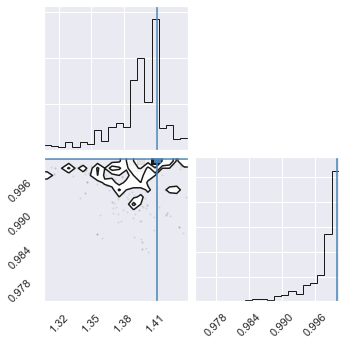

In [11]:
fig = corner.corner(
    flat_samples, truths=[1.41111878, 1]
);

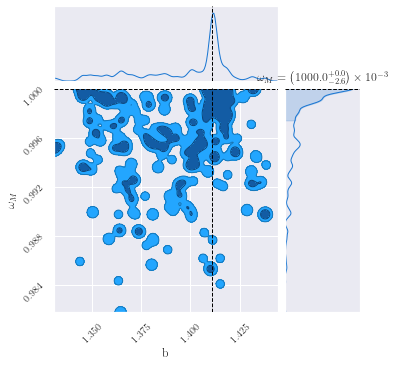

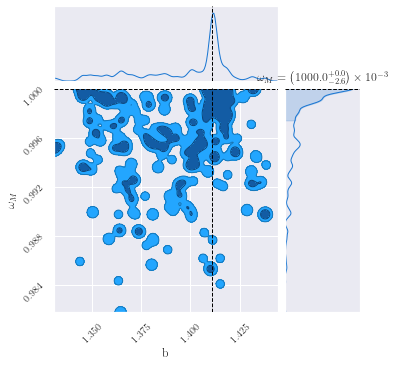

In [35]:
c = ChainConsumer()
c.add_chain(flat_samples, parameters=["b", "$\omega_M$"])
c.plotter.plot(filename="mcmc1.png", figsize="column", truth=[1.41111878, 1])

In [36]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], (['b','\Omega_M'])[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [24]:
"""
Exactly the same thing, but with

[1.2153125000000014, 0.31]

"""
pos = [1.2153125000000014, 0.31] + 1e-4 * np.random.randn(6, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args = (corr_tree, data, centers))
sampler.run_mcmc(pos, 100, progress=True);

100%|██████████| 100/100 [19:39<00:00, 11.79s/it]


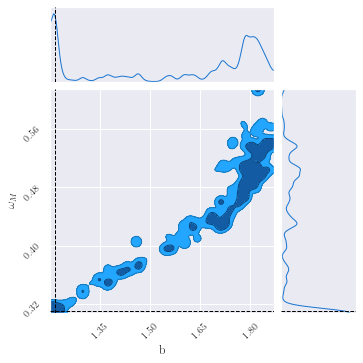

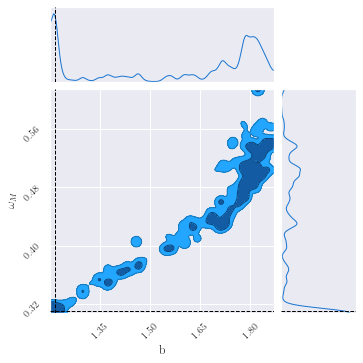

In [25]:
flat_samples2 = sampler.get_chain(flat=True)

c = ChainConsumer()
c.add_chain(flat_samples2, parameters=["b", "$\omega_M$"])
c.plotter.plot(filename="mcmc1.png", figsize="column", truth=[1.2153125000000014, 0.31])

In [31]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples2[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], (['b','\Omega_M'])[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
theta1 = [1.41, 0.998]
theta2 = [1.723, 0.4476]

corr_ccl1 = sccl.getcorrCCL(theta1, data, centers)
result1 = np.einsum('i,i',(corr_tree- theta1[0]**2*corr_ccl1), 
                    np.einsum('ij,j', inv_cov,(corr_tree- theta1[0]**2*corr_ccl1)))

corr_ccl2 = sccl.getcorrCCL(theta2, data, centers)
result2 = np.einsum('i,i',(corr_tree- theta2[0]**2*corr_ccl2), 
                    np.einsum('ij,j', inv_cov,(corr_tree- theta2[0]**2*corr_ccl2)))

In [15]:
result1

782.9194548536948

In [16]:
result2

1007.7441402421474

In [17]:
theta10 = [1.41111878, 1]
theta20 = [1.2153125000000014, 0.31]

corr_ccl10 = sccl.getcorrCCL(theta10, data, centers)
result10 = np.einsum('i,i',(corr_tree- theta10[0]**2*corr_ccl10), 
                    np.einsum('ij,j', inv_cov,(corr_tree- theta10[0]**2*corr_ccl10)))

corr_ccl20 = sccl.getcorrCCL(theta20, data, centers)
result20 = np.einsum('i,i',(corr_tree- theta20[0]**2*corr_ccl20), 
                    np.einsum('ij,j', inv_cov,(corr_tree- theta20[0]**2*corr_ccl20)))

In [18]:
result10

782.6795564359692

In [19]:
result20

1339.5174038698951

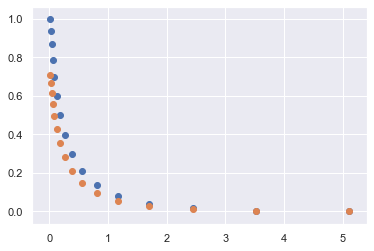

In [25]:
plt.scatter(centers, theta10[0]*corr_ccl10)
plt.scatter(centers, corr_ccl10)

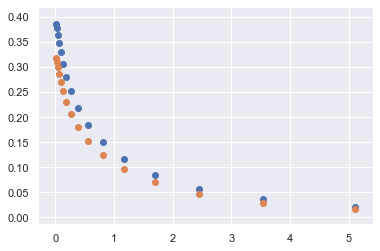

In [26]:
plt.scatter(centers, theta20[0]*corr_ccl20)
plt.scatter(centers, corr_ccl20)